## SpaRTaNS Tutorial: Double Chamber Flow
#### Last updated: 04/30/2022

## Visualize Outputs

- Finally, we can visualize the horizontal, vertical current density
  - as well as the current stream plot, illustrating the vortex behavior characteristic of viscous fluids

-Graphics-   -Graphics-   -Graphics-
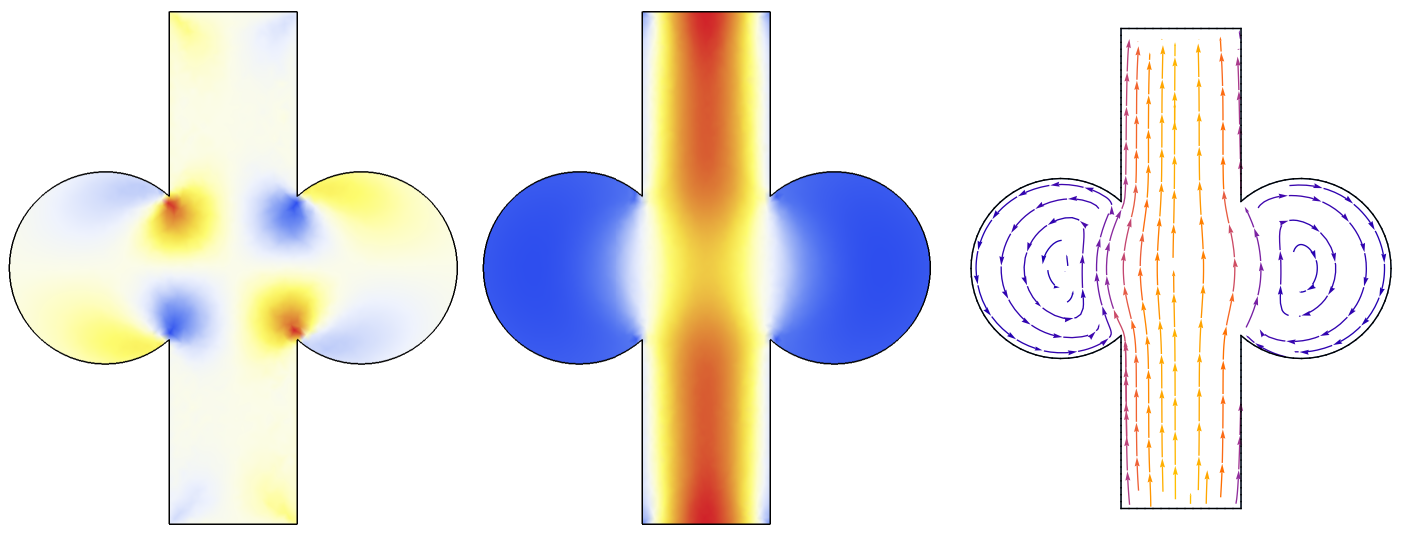

In [79]:
Block[{bOut, horizontalFluxInterpolation, verticalFluxInterpolation, 
  file, sdp, hdp, vdp, streamplot},
 file = FileNameJoin[{FileNameDrop[Directory[],-1], "out-files", 
    "accumulated_000--A.h5"}];
 bOut = Import[file, {"Data", "/Bo_acc"}];
 
 horizontalFluxInterpolation = 
  ElementMeshInterpolation[{mesh["SO2"]["double-chamber"]}, 
   velocities["SO2"][[All, 1]] . bOut, 
   "ExtrapolationHandler" -> {Function[Indeterminate]}];
 
 verticalFluxInterpolation = 
  ElementMeshInterpolation[{mesh["SO2"]["double-chamber"]}, 
   velocities["SO2"][[All, 2]] . bOut, 
   "ExtrapolationHandler" -> {Function[Indeterminate]}];
 
 hdp = Show[
   DensityPlot[
    horizontalFluxInterpolation[x, y, 0], {x, y} \[Element] 
     emesh["middle"], ColorFunction -> "TemperatureMap", 
    Frame -> False, PlotRange -> All, AspectRatio -> Automatic, 
    ImageSize -> 350, PlotPoints -> 50],
   bmesh["middle"]["Wireframe"]
   ];
 
 vdp = Show[
   DensityPlot[
    verticalFluxInterpolation[x, y, 0], {x, y} \[Element] 
     emesh["middle"], ColorFunction -> "TemperatureMap", 
    Frame -> False, PlotRange -> All, AspectRatio -> Automatic, 
    ImageSize -> 350, PlotPoints -> 50],
   bmesh["middle"]["Wireframe"]
   ];
 
 streamplot = 
  Show[StreamPlot[{horizontalFluxInterpolation[x, y, 0], 
     verticalFluxInterpolation[x, y, 0]}, {x, y} \[Element] 
     emesh["middle"], RegionFillingStyle -> None, PlotRange -> All, 
    AspectRatio -> Automatic, ImageSize -> 350, Frame -> False],
   bmesh["middle"]["Wireframe"]
   ];
 
 Multicolumn[{hdp, vdp, streamplot}, 3]
 
 ]